In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
M_earth  = 5.9742412e+24 # kg
R_earth  = 6371010.0 # m
G        = 6.67384e-11 # m^3 / kg s^2
g        = G*M_earth/R_earth**2

vt0      = 340 # m/s
mu0      = g/vt0**2

vt1      = 170 # m/s
mu1      = g/vt1**2

Hs       = 8500

In [3]:
M      = M_earth
r0     = R_earth
v0     = 1e-8
dt0    = 0.1

In [4]:
a0     = 2.1*g
theta  = 20.0/180*pi
t_meco = 450

In [5]:
t = 0.0
x = asarray([r0,0,0])
v = asarray([v0*cos(theta),v0*sin(theta),0])

all_t = []
all_x = []
all_v = []
all_a = []

uz = asarray([0,0,1])
t_turn = 0
reentry_vehicle_separation = False

while norm(x)>=R_earth and t<90*60:
    r = norm(x)
    
    ux = x/r
    ut = cross(uz,ux)
    uv = v/norm(v)

    h = r - R_earth
    
    if(h>100e3):
        reentry_vehicle_separation = True 
        
    if(reentry_vehicle_separation):
        mu = mu1*exp(-h/Hs)
    else:
        mu = mu0*exp(-h/Hs)

    at = 0
    if(t < t_meco): at = a0
    
    h = r-R_earth
    if(h < 10*1e3):
        uat = ux
    elif(dot(uv,ux)>cos(theta*0.95)):
        t_turn = t
        uat = ux*cos(theta)+ut*sin(theta)
    else:
        uat = uv
        
    a = -G*M/r**2*ux + at*uat - mu*norm(v)**2*uv
    
    dt = dt0
    if t<t_meco and t+dt>=t_meco:
        dt = t_meco-t
        t = t_meco
    else:
        t += dt
        
    v += a*dt
    x += v*dt

    all_a.append(a.copy())
    all_v.append(v.copy())
    all_x.append(x.copy())
    all_t.append(t)

all_t = asarray(all_t)
all_x = column_stack(all_x)
all_v = column_stack(all_v)
all_a = column_stack(all_a)

print(t, R_earth*arctan2(x[1],x[0])/1e3, sum(norm(diff(all_x,axis=1),axis=0),axis=0)/1e3)

2222.3999999990406 8864.00575613 10883.2522112


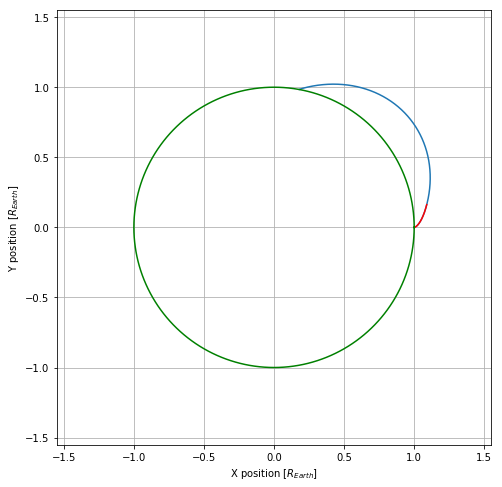

In [6]:
figure(figsize(8,8))
plot(all_x[0,:]/R_earth, all_x[1,:]/R_earth)
plot(all_x[0,all_t<t_meco]/R_earth, all_x[1,all_t<t_meco]/R_earth,'r-')
plot(cos(frange(0,360,1)/180*pi),sin(frange(0,360,1)/180*pi),'g-')
axis('square')
axis(asarray([-1,1,-1,1])*max(norm(all_x, axis=0))/R_earth*1.25)
grid()
#axis([-5,5,-5,5])
xlabel('X position [$R_{Earth}$]')
ylabel('Y position [$R_{Earth}$]')

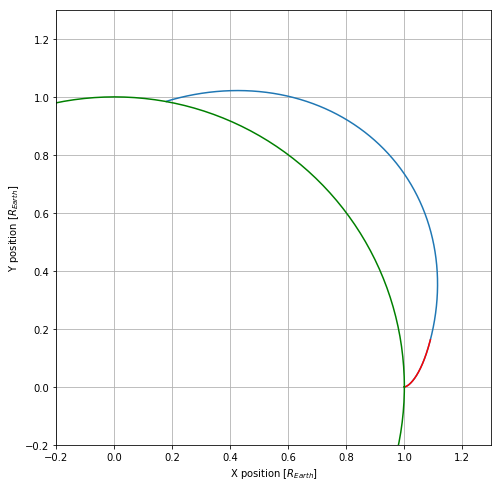

In [7]:
figure(figsize(8,8))
plot(all_x[0,:]/R_earth, all_x[1,:]/R_earth)
plot(all_x[0,all_t<t_meco]/R_earth, all_x[1,all_t<t_meco]/R_earth,'r-')
plot(cos(frange(0,360,1)/180*pi),sin(frange(0,360,1)/180*pi),'g-')
axis('square')
axis([-0.2,1.30,-0.2,1.30])
grid()
xlabel('X position [$R_{Earth}$]')
ylabel('Y position [$R_{Earth}$]')

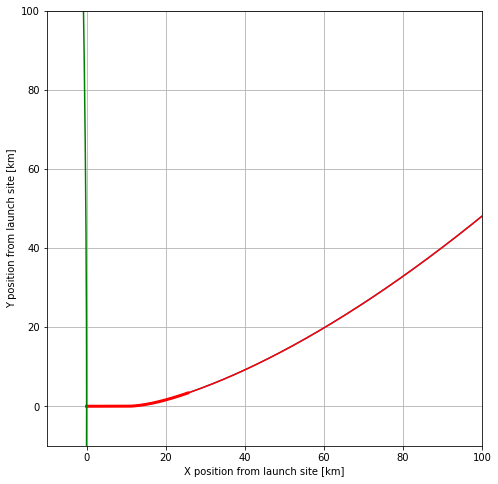

In [8]:
figure(figsize(8,8))
plot((all_x[0,:]-R_earth)/1e3, all_x[1,:]/1e3)
plot((all_x[0,all_t<t_meco]-R_earth)/1e3, all_x[1,all_t<t_meco]/1e3,'r-')
plot((all_x[0,all_t<t_turn]-R_earth)/1e3, all_x[1,all_t<t_turn]/1e3,'r-',lw=3)
plot((cos(frange(0,360,0.1)/180*pi)-1)*R_earth/1e3,sin(frange(0,360,0.1)/180*pi)*R_earth/1e3,'g-')
axis('square')
axis([-10,100,-10,100])
grid()
xlabel('X position from launch site [km]')
ylabel('Y position from launch site [km]')

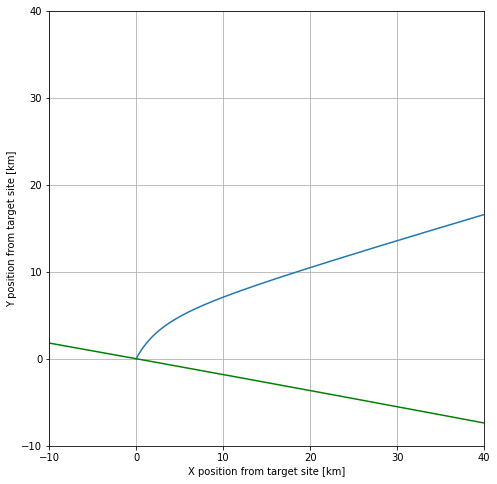

In [9]:
figure(figsize(8,8))
plot((all_x[0,:]-x[0])/1e3, (all_x[1,:]-x[1])/1e3)
plot((cos(frange(0,360,0.1)/180*pi)*R_earth-x[0])/1e3,(sin(frange(0,360,0.1)/180*pi)*R_earth-x[1])/1e3,'g-')
axis('square')
axis([-10,40,-10,40])
grid()
xlabel('X position from target site [km]')
ylabel('Y position from target site [km]')

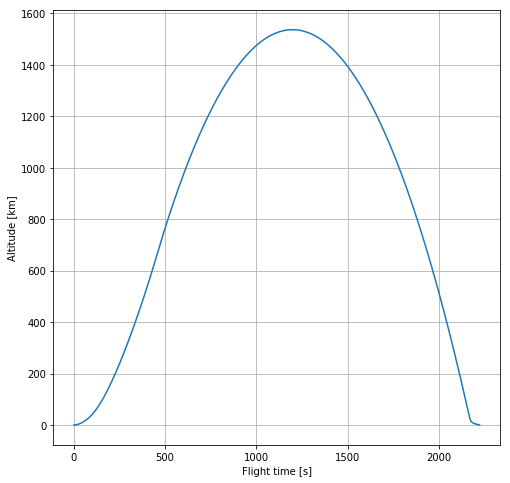

In [10]:
figure(figsize(8,8))
plot(all_t, (norm(all_x,axis=0)-R_earth)/1e3)
#axis([0,2000,0,800])
grid()
xlabel('Flight time [s]')
ylabel('Altitude [km]')

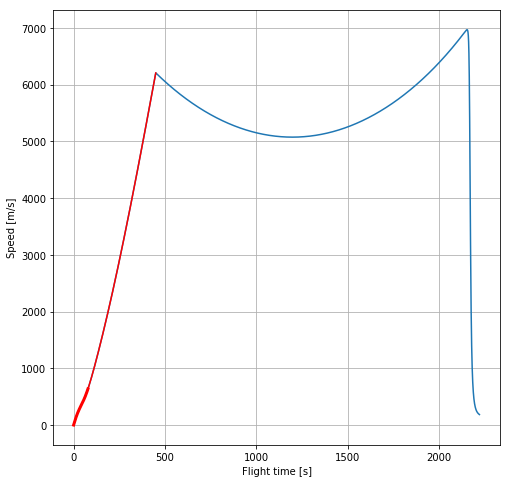

In [11]:
plot(all_t,norm(all_v,axis=0))
plot(all_t[all_t<t_meco],norm(all_v,axis=0)[all_t<t_meco],'r-')
plot(all_t[all_t<t_turn],norm(all_v,axis=0)[all_t<t_turn],'r-',lw=3)
grid()
xlabel('Flight time [s]')
ylabel('Speed [m/s]')

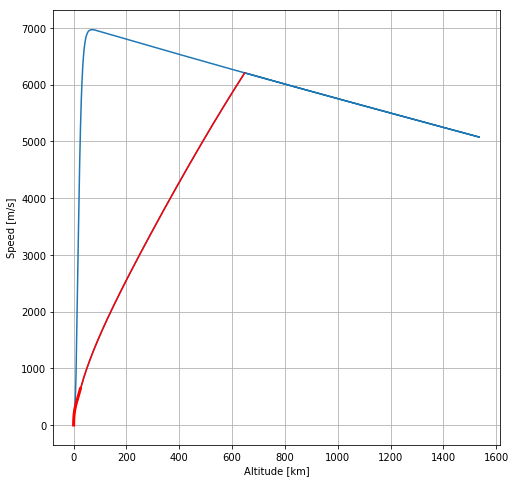

In [12]:
figure(figsize(8,8))
plot((norm(all_x,axis=0)-R_earth)/1e3, norm(all_v,axis=0))
plot((norm(all_x,axis=0)-R_earth)[all_t<t_meco]/1e3,norm(all_v,axis=0)[all_t<t_meco],'r-')
plot((norm(all_x,axis=0)-R_earth)[all_t<t_turn]/1e3,norm(all_v,axis=0)[all_t<t_turn],'r-',lw=3)
#axis([0,2000,0,800])
grid()
xlabel('Altitude [km]')
ylabel('Speed [m/s]')